imported
loaded


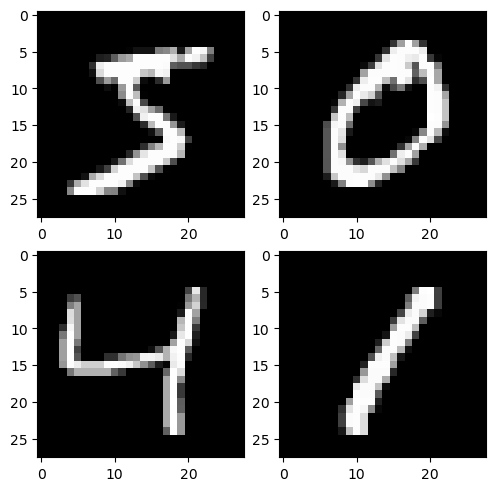

In [4]:
from glio.importsall import *
from glio.datasets import MNIST
print('imported')
dstrain, dstest = MNIST.get_mnist_classification()
print('loaded')
dstrain.preview()

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = ConvBlock(1, 16, 4, 1, act=nn.ReLU(), pool=nn.MaxPool2d(2,2))
        self.c2 = ConvBlock(16, 32, 3, 1, act=nn.ReLU(), pool=nn.MaxPool2d(2, 2))
        self.c3 = ConvBlock(32, 64, 2, 1, act=nn.ReLU(), pool=nn.MaxPool2d(2, 2))
        self.linear = LinearBlock(64*3*3, 10, act=nn.Softmax(dim=1), flatten=True)
    
    def forward(self,x):
        x = self.c1(x)
        x = self.c2(x)
        x = self.c3(x)
        x = self.linear(x)
        return x


print(f'{count_parameters(CNN()) = }')
gsummary(CNN(), (1, 1, 28,28))

count_parameters(CNN()) = 18938
path                                         module                                       input size               output size              params    buffers   
__main__.CNN/c1/0                            torch.nn.modules.conv.Conv2d                 (1, 1, 28, 28)           (1, 16, 29, 29)          272       0         
__main__.CNN/c1/1                            torchzero.nn.layers.crop.SpatialReduceCrop   (1, 16, 29, 29)          (1, 16, 28, 28)          0         0         
__main__.CNN/c1/2                            torch.nn.modules.pooling.MaxPool2d           (1, 16, 28, 28)          (1, 16, 14, 14)          0         0         
__main__.CNN/c1/3                            torch.nn.modules.activation.ReLU             (1, 16, 14, 14)          (1, 16, 14, 14)          0         0         
__main__.CNN/c2/0                            torch.nn.modules.conv.Conv2d                 (1, 16, 14, 14)          (1, 32, 14, 14)          4640      0         
__

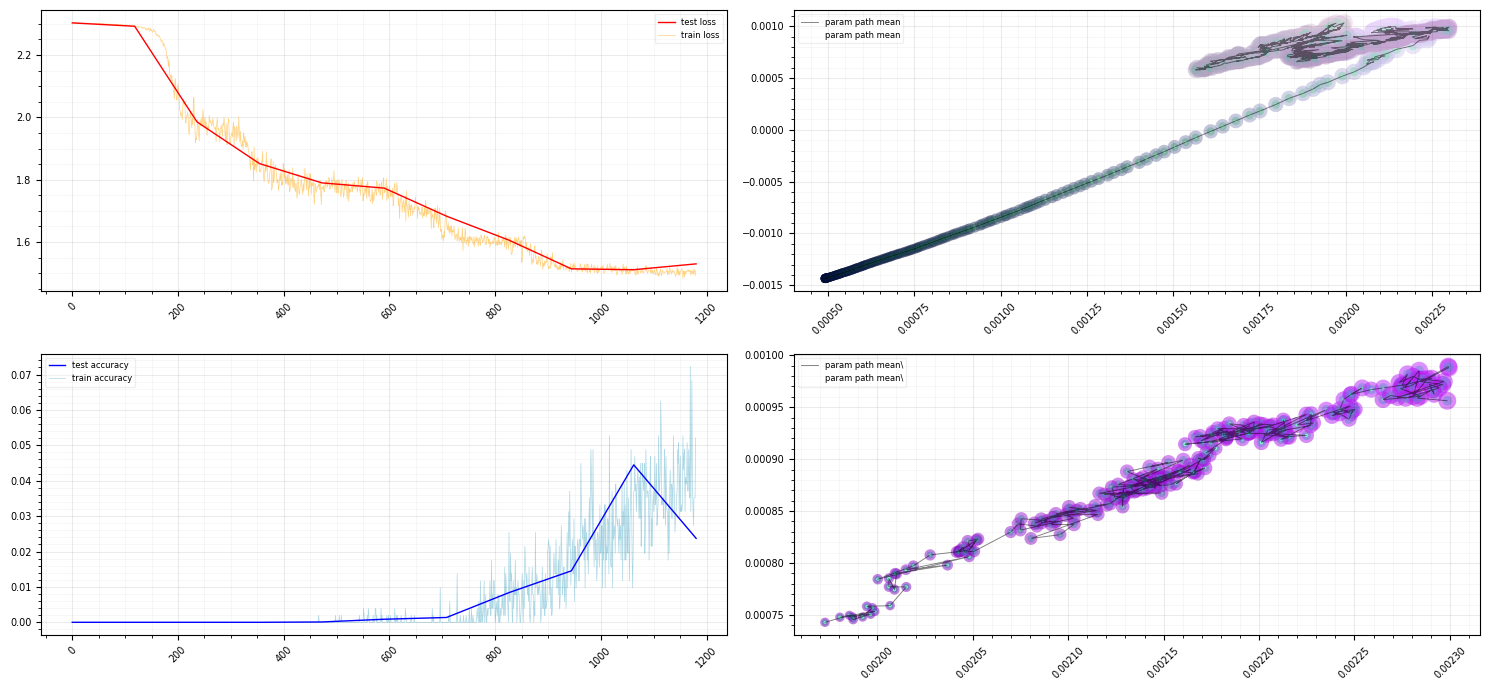

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉     | 10/10 | 7.97s/ops, elapsed: 01m:11s, rem: 7.97s | 

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉  | 20/20 | 65.97ops/s, elapsed: 288ms, rem: 15ms | 
train loss:                              last = 1.508, min = 1.483, max = 2.303
test loss:                               last = 1.511, min = 1.511, max = 2.303
train accuracy:                          last = 0.052, min = 0.000, max = 0.072
test accuracy:                           last = 0.044, min = 0.000, max = 0.044

| metric | n | min | max | first | last |
| :- | :- | :- | :- | :- | :- |
| grad std | 1180 | 0.0002 | 0.0191 | 0.0002 | 0.0059 |
| grad-update angle | 1180 | 0.8817 | 2.3286 | 1.4829 | 1.8008 |
| grad-update mean | 1180 | 0.0001 | 0.0066 | 0.0001 | 0.0029 |
| last grads mean | 1179 | 0.0001 | 0.0092 | 0.0001 | 0.0033 |
| last updates std | 1179 | 0.0000 | 0.0017 | 0.0000 | 0.0004 |
| param max | 1180 | 0.2477 | 0.6030 | 0.2485 | 0.6030 |
| param mean | 1180 | 0.0001 | 0.0024 | 0.0001 | 0.0021 |
| param min | 1180 | -0.3113 | -0.2466 | -0.2494 | -0.3113 |
| param var | 1180 | 0.0022 | 0.0035 | 0.0022 | 0.0035 |
| train accuracy | 1180 | 0.0000 | 0.0723 | 0.0000 | 0.0521 |
| test accuracy | 11 | 0.0000 | 0.0445 | 0.0000 | 0.0237 |
| test accuracy max | 11 | 0.0000 | 0.0781 | 0.0000 | 0.0449 |
| test accuracy median | 11 | 0.0000 | 0.0439 | 0.0000 | 0.0215 |
| test accuracy min | 11 | 0.0000 | 0.0147 | 0.0000 | 0.0037 |
| train loss | 1180 | 1.4828 | 2.3032 | 2.3032 | 1.5076 |
| test loss | 11 | 1.5113 | 2.3029 | 2.3029 | 1.5301 |
| test loss max | 11 | 1.5400 | 2.3032 | 2.3032 | 1.5666 |
| test loss median | 11 | 1.5132 | 2.3029 | 2.3029 | 1.5298 |
| test loss min | 11 | 1.4792 | 2.3026 | 2.3026 | 1.4928 |
| time | 1180 | 2.6058 | 78.4254 | 2.6058 | 78.4254 |
| update angle | 1180 | 0.0004 | 0.0373 | 0.0004 | 0.0100 |
| update var | 1180 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |


In [3]:
from torchzero.optim.first_order.gd import GD
with seeded_rng(): MODEL = CNN()
LR = 1e-1
MAGN = None
BATCH_SIZE = 512
N_EPOCHS = 10
LOSS_FN = nn.CrossEntropyLoss()
METRIC_STEP = 1

with seeded_rng():
    DLTRAIN = DataLoader(dstrain, BATCH_SIZE, shuffle=True, **seed0_kwargs)
    DLTEST = DataLoader(dstest, BATCH_SIZE, shuffle=False, **seed0_kwargs)

OPT = GD(MODEL.parameters(), lr = LR)
#SCHED = lr_scheduler.CosineAnnealingLR(OPT, N_EPOCHS)
SCHED = None

CALLBACKS = (LogLossCB(),

            SaveForwardChannelImagesCB(dstest[0][0].unsqueeze(0)),
            MetricAccuracyCB(),
            LogParamDistCB(METRIC_STEP),
            LogParamPathCB(METRIC_STEP),
            LogUpdateDistCB(METRIC_STEP),
            LogUpdatePathCB(METRIC_STEP),
            LogLastUpdatesAngleCB(METRIC_STEP),
            LogGradDistCB(METRIC_STEP),
            LogGradUpdateAngleCB(METRIC_STEP),
            LogGradPathCB(METRIC_STEP),
            LogLastGradsAngleCB(METRIC_STEP),
            LogTimeCB(),
            #LogLRCB(),
            #LogOptimizerParamCB('magn'),
            DisplayLoggerTableCB(),
            AccelerateCB("no"),
            PerformanceTweaksCB(True),
            SaveLastCB(),
            LivePlotCB(1000, plot_keys = ("4plotsplot","10metrics01"),path_keys=("4plotspath250",)),
            SimpleProgressBarCB(),
            OneBatchClosureCB(),
            #GradientFreeWithZeroGradCB(),
            #OneBatchClosureWithNoBackwardCB(),
)
clean_mem()

# MODEL = gnn.LSUV(MODEL, DLTRAIN, max_iter=5)

LEARNER_NAME = f"RandomOptimizer lr{LR:.0e} magn{LR:.0e}"
learner = Learner(MODEL, LEARNER_NAME, CALLBACKS, loss_fn=LOSS_FN, optimizer=OPT, scheduler=SCHED, )
learner.fit(N_EPOCHS, DLTRAIN, DLTEST,test_on_interrupt=False)

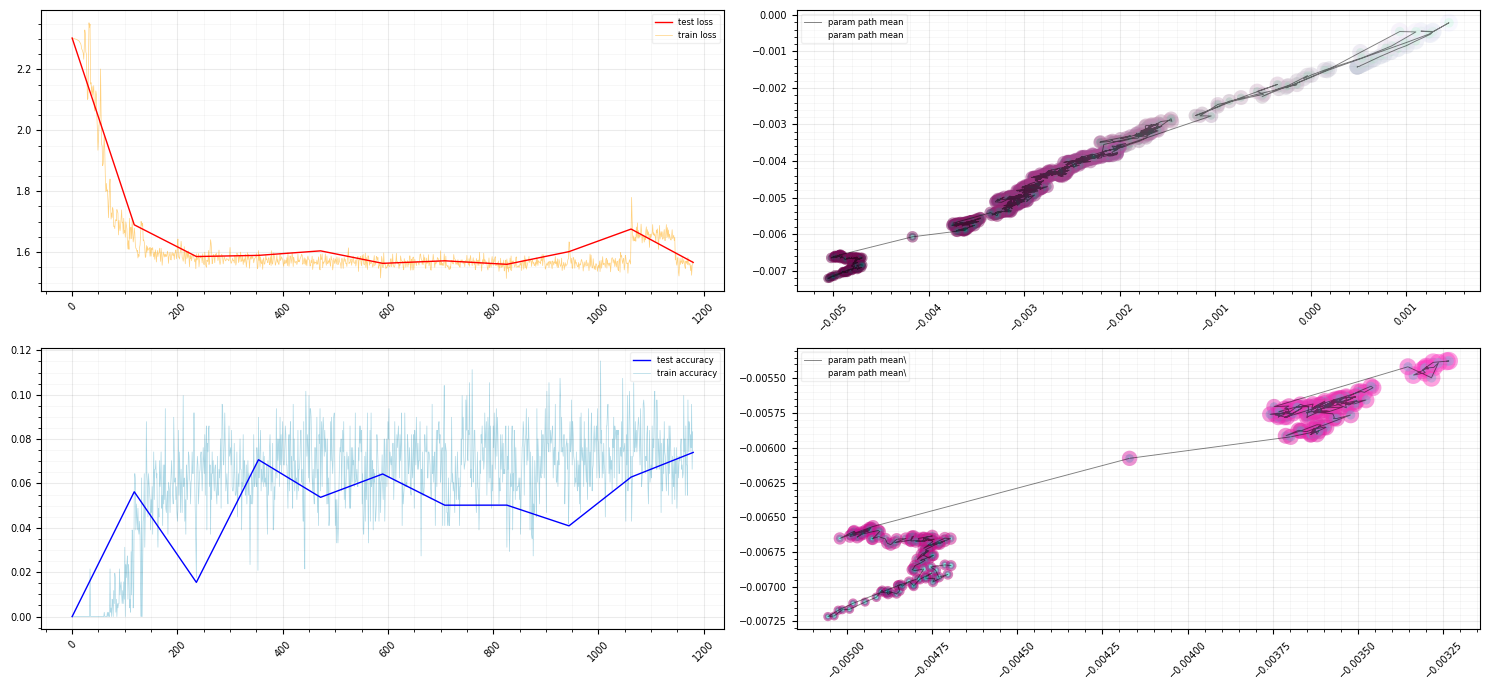

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉     | 10/10 | 7.71s/ops, elapsed: 01m:09s, rem: 7.71s | 

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉  | 20/20 | 55.92ops/s, elapsed: 340ms, rem: 18ms | 
train loss:                              last = 1.570, min = 1.514, max = 2.353
test loss:                               last = 1.676, min = 1.560, max = 2.303
train accuracy:                          last = 0.083, min = 0.000, max = 0.115
test accuracy:                           last = 0.063, min = 0.000, max = 0.071

| metric | n | min | max | first | last |
| :- | :- | :- | :- | :- | :- |
| grad std | 1180 | 0.0002 | 0.0103 | 0.0002 | 0.0017 |
| grad-update angle | 1180 | 0.7299 | 2.5168 | 1.5850 | 1.5723 |
| grad-update mean | 1180 | 0.0001 | 0.0046 | 0.0001 | 0.0008 |
| last grads mean | 1179 | 0.0001 | 0.0079 | 0.0001 | 0.0008 |
| last updates std | 1179 | 0.0001 | 0.0088 | 0.0001 | 0.0013 |
| param max | 1180 | 0.2478 | 0.6765 | 0.2480 | 0.6658 |
| param mean | 1180 | -0.0048 | 0.0013 | 0.0001 | -0.0045 |
| param min | 1180 | -0.5582 | -0.2475 | -0.2491 | -0.5417 |
| param var | 1180 | 0.0022 | 0.0063 | 0.0022 | 0.0063 |
| train accuracy | 1180 | 0.0000 | 0.1152 | 0.0000 | 0.0833 |
| test accuracy | 11 | 0.0000 | 0.0740 | 0.0000 | 0.0740 |
| test accuracy max | 11 | 0.0000 | 0.1113 | 0.0000 | 0.1094 |
| test accuracy median | 11 | 0.0000 | 0.0723 | 0.0000 | 0.0723 |
| test accuracy min | 11 | 0.0000 | 0.0404 | 0.0000 | 0.0404 |
| train loss | 1180 | 1.5136 | 2.3531 | 2.3031 | 1.5702 |
| test loss | 11 | 1.5599 | 2.3029 | 2.3029 | 1.5661 |
| test loss max | 11 | 1.5812 | 2.3032 | 2.3032 | 1.5989 |
| test loss median | 11 | 1.5611 | 2.3029 | 2.3029 | 1.5668 |
| test loss min | 11 | 1.5408 | 2.3026 | 2.3026 | 1.5435 |
| time | 1180 | 1.2015 | 76.4955 | 1.2015 | 76.4955 |
| update angle | 1180 | 0.0029 | 0.1659 | 0.0044 | 0.0209 |
| update var | 1180 | 0.0000 | 0.0001 | 0.0000 | 0.0000 |


In [6]:
from torchzero.optim.first_order.gd import GD
with seeded_rng(): MODEL = CNN()
LR = 1
MAGN = None
BATCH_SIZE = 512
N_EPOCHS = 10
LOSS_FN = nn.CrossEntropyLoss()
METRIC_STEP = 1

with seeded_rng():
    DLTRAIN = DataLoader(dstrain, BATCH_SIZE, shuffle=True, **seed0_kwargs)
    DLTEST = DataLoader(dstest, BATCH_SIZE, shuffle=False, **seed0_kwargs)

OPT = GD(MODEL.parameters(), lr = LR)
#SCHED = lr_scheduler.CosineAnnealingLR(OPT, N_EPOCHS)
SCHED = None

CALLBACKS = (LogLossCB(),

            SaveForwardChannelImagesCB(dstest[0][0].unsqueeze(0)),
            MetricAccuracyCB(),
            LogParamDistCB(METRIC_STEP),
            LogParamPathCB(METRIC_STEP),
            LogUpdateDistCB(METRIC_STEP),
            LogUpdatePathCB(METRIC_STEP),
            LogLastUpdatesAngleCB(METRIC_STEP),
            LogGradDistCB(METRIC_STEP),
            LogGradUpdateAngleCB(METRIC_STEP),
            LogGradPathCB(METRIC_STEP),
            LogLastGradsAngleCB(METRIC_STEP),
            LogTimeCB(),
            #LogLRCB(),
            #LogOptimizerParamCB('magn'),
            DisplayLoggerTableCB(),
            AccelerateCB("no"),
            PerformanceTweaksCB(True),
            SaveLastCB(),
            LivePlotCB(1000, plot_keys = ("4plotsplot","10metrics01"),path_keys=("4plotspath250",)),
            SimpleProgressBarCB(),
            OneBatchClosureCB(),
            #GradientFreeWithZeroGradCB(),
            #OneBatchClosureWithNoBackwardCB(),
)
clean_mem()

# MODEL = gnn.LSUV(MODEL, DLTRAIN, max_iter=5)

LEARNER_NAME = f"RandomOptimizer lr{LR:.0e} magn{LR:.0e}"
learner = Learner(MODEL, LEARNER_NAME, CALLBACKS, loss_fn=LOSS_FN, optimizer=OPT, scheduler=SCHED, )
learner.fit(N_EPOCHS, DLTRAIN, DLTEST,test_on_interrupt=False)